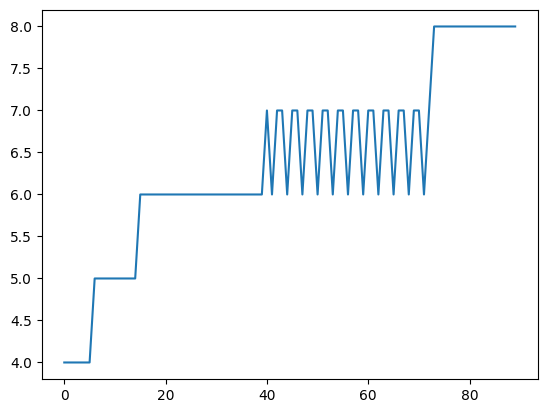

In [ ]:
import random
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, input_count):
        self.weights = [random.random() for _ in range(input_count)]
        self.bias = random.random()
        self.learning_rate = 0.01

    def _calculate_output(self, input_list):
        sum = 0
        for w, i in zip(self.weights, input_list):
            sum += i*w
        return sum + self.bias

    def _activation(self, output):
        return 1 if output > 0 else 0

    def predict(self, input_list):
        output = self._calculate_output(input_list)
        return self._activation(output)

    def learn(self, input_list, error):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * error * input_list[i]
        self.bias -= self.learning_rate * error


input_lists = [[1, 1, 1],
               [1, 0, 1],
               [0, 1, 1],
               [0, 0, 1],
               [1, 1, 0],
               [1, 0, 0],
               [0, 1, 0],
               [0, 0, 0]]
outputs = [1,
           0,
           0,
           0,
           1,
           1,
           1,
           1]

def runTraining(neuron):
    for input_list, output in zip(input_lists, outputs):
        error = neuron.predict(input_list) - output
        neuron.learn(input_list, error)

def runTesting(neuron):
    return [neuron.predict(input_list) for input_list in input_lists]

def runEvaluation(neuron):
    predictions = runTesting(neuron)
    performance = 0
    for ground_truth, prediction in zip(outputs, predictions):
        if ground_truth == prediction:
            performance += 1
    return performance

if __name__ == "__main__":
    neuron = Neuron(len(input_lists[0]))

    epoch = 90
    performanceImprovement = []
    for i in range(epoch):
        runTraining(neuron)
        performanceImprovement.append(runEvaluation(neuron))

    plt.plot([i for i in range(epoch)], performanceImprovement)
    plt.show()